In [1]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
import sklearn.metrics 
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt

D:\Programfiles\anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [2]:
data = pd.read_csv("cancer_data.csv")

In [3]:
data.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [4]:
data.isna().sum()

id                         0
diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

In [5]:
data1 = data.drop(["id"],axis=1)

In [6]:
x= data1.copy()

In [7]:
y=x["diagnosis"]
x.pop("diagnosis")
y = y.map({'B':0,'M':1})


In [8]:
model=RandomForestClassifier()

In [9]:
x.isna().sum()

radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

In [10]:
type(x)

pandas.core.frame.DataFrame

In [11]:
model.fit(x,y)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [12]:
model.feature_importances_

array([0.00320164, 0.01126513, 0.00636051, 0.08713354, 0.00426761,
       0.01308019, 0.01618902, 0.06772965, 0.00264127, 0.00481874,
       0.00760214, 0.00216138, 0.0065688 , 0.07118555, 0.01010653,
       0.00228423, 0.00259966, 0.00233107, 0.00522101, 0.00300777,
       0.14597299, 0.01435256, 0.09022424, 0.10423711, 0.00870202,
       0.00224682, 0.02216901, 0.25753999, 0.01374465, 0.01105514])

In [13]:
feature_importance = pd.Series(model.feature_importances_,index=x.columns.values)

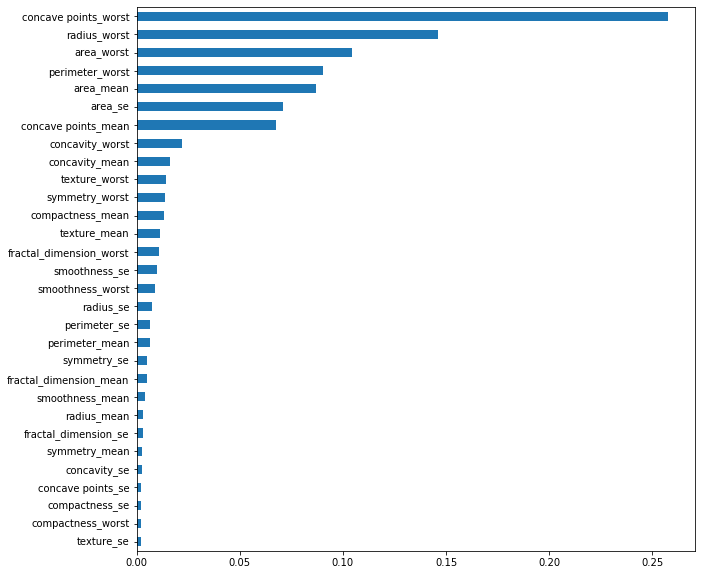

In [14]:
graph = pd.Series(feature_importance,index = x.columns)
graph.sort_values(inplace = True)
graph.plot(kind = "barh",figsize=(10,10))

# line' : line plot (default)
#     - 'bar' : vertical bar plot
#     - 'barh' : horizontal bar plot
#     - 'hist' : histogram
#     - 'box' : boxplot
#     - 'kde' : Kernel Density Estimation plot
#     - 'density' : same as 'kde'
#     - 'area' : area plot
#     - 'pie' : pie plot
#     - 'scatter' : scatter plot
#     - 'hexbin' : hexbin plot.

In [15]:
from sklearn.preprocessing import StandardScaler

In [16]:
scaled_x = StandardScaler().fit_transform(x)

In [17]:
pd.DataFrame(scaled_x)

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
0,1.097064,-2.073335,1.269934,0.984375,1.568466,3.283515,2.652874,2.532475,2.217515,2.255747,...,1.886690,-1.359293,2.303601,2.001237,1.307686,2.616665,2.109526,2.296076,2.750622,1.937015
1,1.829821,-0.353632,1.685955,1.908708,-0.826962,-0.487072,-0.023846,0.548144,0.001392,-0.868652,...,1.805927,-0.369203,1.535126,1.890489,-0.375612,-0.430444,-0.146749,1.087084,-0.243890,0.281190
2,1.579888,0.456187,1.566503,1.558884,0.942210,1.052926,1.363478,2.037231,0.939685,-0.398008,...,1.511870,-0.023974,1.347475,1.456285,0.527407,1.082932,0.854974,1.955000,1.152255,0.201391
3,-0.768909,0.253732,-0.592687,-0.764464,3.283553,3.402909,1.915897,1.451707,2.867383,4.910919,...,-0.281464,0.133984,-0.249939,-0.550021,3.394275,3.893397,1.989588,2.175786,6.046041,4.935010
4,1.750297,-1.151816,1.776573,1.826229,0.280372,0.539340,1.371011,1.428493,-0.009560,-0.562450,...,1.298575,-1.466770,1.338539,1.220724,0.220556,-0.313395,0.613179,0.729259,-0.868353,-0.397100
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,2.110995,0.721473,2.060786,2.343856,1.041842,0.219060,1.947285,2.320965,-0.312589,-0.931027,...,1.901185,0.117700,1.752563,2.015301,0.378365,-0.273318,0.664512,1.629151,-1.360158,-0.709091
565,1.704854,2.085134,1.615931,1.723842,0.102458,-0.017833,0.693043,1.263669,-0.217664,-1.058611,...,1.536720,2.047399,1.421940,1.494959,-0.691230,-0.394820,0.236573,0.733827,-0.531855,-0.973978
566,0.702284,2.045574,0.672676,0.577953,-0.840484,-0.038680,0.046588,0.105777,-0.809117,-0.895587,...,0.561361,1.374854,0.579001,0.427906,-0.809587,0.350735,0.326767,0.414069,-1.104549,-0.318409
567,1.838341,2.336457,1.982524,1.735218,1.525767,3.272144,3.296944,2.658866,2.137194,1.043695,...,1.961239,2.237926,2.303601,1.653171,1.430427,3.904848,3.197605,2.289985,1.919083,2.219635


In [18]:
model = RandomForestClassifier(n_estimators = 100 ,oob_score=True,random_state=100)
model.fit(x,y)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
            oob_score=True, random_state=100, verbose=0, warm_start=False)

In [19]:
model.oob_score_

0.9630931458699473

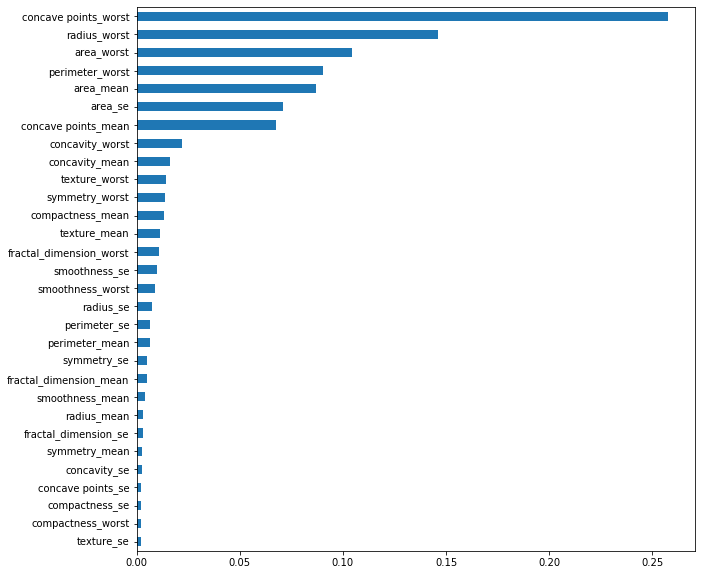

In [20]:
import matplotlib.pyplot as plt
feature_importance.sort_values(inplace=True)
feature_importance.plot(kind='barh', figsize=(10,10))
plt.show()

# Parameter Optimization

In [21]:
%%timeit
model = RandomForestClassifier(n_estimators=100,n_jobs=-1,oob_score=True,random_state=100)
model.fit(x,y)

237 ms ± 61.4 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [22]:
%%timeit
model = RandomForestClassifier(n_estimators=100,n_jobs=1,oob_score=True,random_state=100)
model.fit(x,y)

182 ms ± 45.7 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


# n_estimators

variables 10
OOB 0.9332161687170475
variables 50
OOB 0.9595782073813708


D:\Programfiles\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:453: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
D:\Programfiles\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:458: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


variables 100
OOB 0.9630931458699473
variables 500
OOB 0.9630931458699473
variables 1000
OOB 0.9648506151142355
variables 2000
OOB 0.9666080843585237
variables 3000
OOB 0.9648506151142355


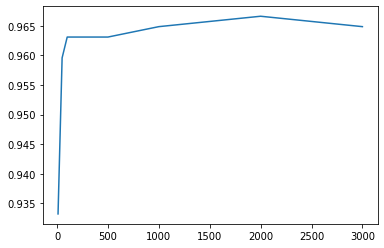

In [23]:
result=[]
estimators=[10,50,100,500,1000,2000,3000]
for variables in estimators:
    model = RandomForestClassifier(n_estimators=variables,oob_score=True,random_state=100)
    model.fit(x,y)
    print("variables",variables)
    oob = model.oob_score_
    print("OOB",model.oob_score_)
    result.append(oob)
pd.Series(result, estimators).plot()

# max_features

In [24]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 30 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   radius_mean              569 non-null    float64
 1   texture_mean             569 non-null    float64
 2   perimeter_mean           569 non-null    float64
 3   area_mean                569 non-null    float64
 4   smoothness_mean          569 non-null    float64
 5   compactness_mean         569 non-null    float64
 6   concavity_mean           569 non-null    float64
 7   concave points_mean      569 non-null    float64
 8   symmetry_mean            569 non-null    float64
 9   fractal_dimension_mean   569 non-null    float64
 10  radius_se                569 non-null    float64
 11  texture_se               569 non-null    float64
 12  perimeter_se             569 non-null    float64
 13  area_se                  569 non-null    float64
 14  smoothness_se            5

In [25]:
y.astype("float64")

0      1.0
1      1.0
2      1.0
3      1.0
4      1.0
      ... 
564    1.0
565    1.0
566    1.0
567    1.0
568    0.0
Name: diagnosis, Length: 569, dtype: float64

features_value : auto
oob : 0.969187675070028
features_value : None
oob : 0.9607843137254902
features_value : sqrt
oob : 0.969187675070028
features_value : log2
oob : 0.969187675070028
features_value : 0.9
oob : 0.9635854341736695
features_value : 0.2
oob : 0.969187675070028
features_value : 1
oob : 0.9663865546218487


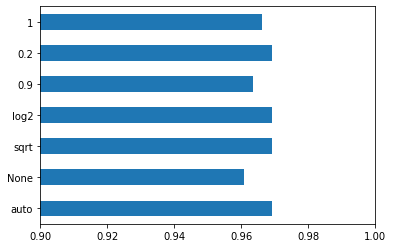

In [38]:
result=[]
features=["auto", None, "sqrt", "log2", 0.9, 0.2,1]
for variables in features:
    model = RandomForestClassifier(n_estimators=50,max_features=variables,random_state=100,oob_score=True)
    model.fit(x,y)
    print("features_value :",variables)
    oob=model.oob_score_
    print("oob :",oob)
    result.append(oob)
    
pd.Series(result,features).plot(kind='barh', xlim=(.90, 1))

features_value : 1
oob : 0.9648506151142355
features_value : 2
oob : 0.961335676625659
features_value : 3
oob : 0.9595782073813708
features_value : 4
oob : 0.9560632688927944
features_value : 5
oob : 0.9507908611599297
features_value : 6
oob : 0.9543057996485061
features_value : 7
oob : 0.9525483304042179
features_value : 8
oob : 0.9543057996485061
features_value : 9
oob : 0.9490333919156415
features_value : 10
oob : 0.9525483304042179


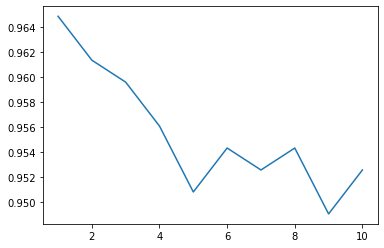

In [27]:
result=[]
features=[1,2,3,4,5,6,7,8,9,10]
for variables in features:
    model = RandomForestClassifier(n_estimators=50,max_features="log2",random_state=100,oob_score=True,min_samples_leaf=variables)
    model.fit(x,y)
    print("features_value :",variables)
    oob=model.oob_score_
    print("oob :",oob)
    result.append(oob)
    
pd.Series(result,features).plot()

In [28]:
model = RandomForestClassifier(n_estimators=50, 
                              oob_score=True, 
                              n_jobs=-1, 
                              random_state=100, 
                              max_features="log2", 
                              min_samples_leaf=3)
model.fit(x, y)
OOB = model.oob_score_
print('OOB: ', OOB)

OOB:  0.9595782073813708


In [29]:
from imblearn.over_sampling import SMOTE
x,y=SMOTE().fit_sample(x,y)
model.fit(x,y)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='log2', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=3, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=50, n_jobs=-1,
            oob_score=True, random_state=100, verbose=0, warm_start=False)

In [30]:
y_predict=model.predict(x)

In [31]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y,y_predict)

array([[357,   0],
       [  5, 352]], dtype=int64)

In [32]:
cross_val_score(estimator=model,X=x,y=y,cv=5)

array([0.95138889, 0.97916667, 0.97183099, 0.96478873, 0.97183099])

In [33]:
from sklearn.metrics import accuracy_score
accuracy_score(y,y_predict)

0.9929971988795518

In [34]:
from sklearn.metrics import classification_report
print(classification_report(y,y_predict))

             precision    recall  f1-score   support

          0       0.99      1.00      0.99       357
          1       1.00      0.99      0.99       357

avg / total       0.99      0.99      0.99       714



In [35]:
y_predict.reshape(-1 ,1)

array([[1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [1],
       [0],
       [1],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [1],
    